<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
##Taller trabajado en equipo con Ricardo Mondragón

import re
import json
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
#from plotly.offline import iplot // error en el import de esta librería... no podría generar el pca

In [2]:
# Cargar datos
path = "C:/Users/USER/OneDrive - Fundación Universitaria Konrad Lorenz/nlp/Taller8/reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [3]:
#revisar balanceo de datos
data.review_body.value_counts(normalize = True)

Calidad precio buena                                                                                                                                                                                                                                                                                                                                                                                                                           0.002
Preciosa y buenos materiales                                                                                                                                                                                                                                                                                                                                                                                                                   0.001
Buen sonido, buena calidad y un precio no muy exagerado. Buena relación calidad precio                                        

In [4]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())


###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [5]:
ks = []
k_inertias = []

for k in range(1,40):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

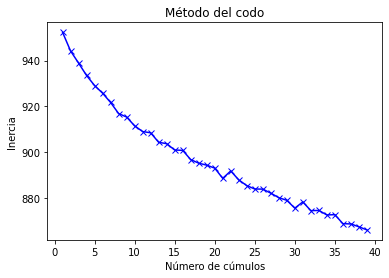

In [6]:
# list(zip(ks,k_inertias))

plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');


In [7]:
k = 10
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=10)

In [8]:
data['cluster'] = model.labels_
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,5
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,4
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,9
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,9
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,5
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,8
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,1
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,3
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,9


In [9]:
### `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [10]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 58 registros (5.80% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
juego el en español que es no de un para pero los te más lo del la divertido jugar muy 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Hay que tener en cuenta que el juego es una ampliación y si no tienes el juego inicial, no vale para nada.

 *** Es un juego bonito y divertido, pero es que tiene excesivas paradas, me corta mucho el juego , está bien , pero..

 *** El juego es muy bonito pero no está en español tal y como reseña


********************************************

Cluster # 1
Tiene 87 registros (8.70% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
el por precio con que un de producto cumple la bien más no buen en caja lo sin está se 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Por el precio que tiene está muy bien

 *** No es muy fina, pero por el precio que tiene poco más se puede pedir.

 *** El juego en sí es increíble. A estas alturas de la generación poco más se puede decir salvo que es el simulador de condu

###  `[15 pts]` Punto 4: Interpretación de los clusters

In [14]:
clusters = {0: 'Bonito, divertido',
            1: 'Relación calidad-precio',
            2: 'Observación con la logística',
            3: 'Bonitos pero pequeños',
            4: 'Conforme con la logística',
            5: 'Bonitos pero pequeños',
            6: 'Observaciones sobre el diseño',
            7: 'Compró para regalar',
            8: 'Percepciónes sobre calidad',
            9: 'Lo esperaba diferente'}

data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,nombres_clusters
601,es_0430819,product_es_0863183,reviewer_es_0920752,1,"La batería no funcionaba, mal etiquetado el ""c...",No funciona,es,video_games,9,Lo esperaba diferente
790,es_0165433,product_es_0451337,reviewer_es_0577308,1,Problemas logísticos con los puntos de entrega...,No llegó,es,video_games,1,Relación calidad-precio


###  `[BONUS: 3 pts]` Visualización usando PCA

# Comparación

### `[BONUS 20 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [12]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]


### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

In [13]:
# 1. Categoricos, en función de los cluster identificados orientados a la percepción del producto, entrega y función.
# 2. Por la falla con la reducción de las stop-words, se perdieron más del 40% de los datos en clasificaciones que allí agruparon. Al resetear el kernel y volver a ejecutar, clasificó diferente.
# 3. Merece conocer el set de datos para experimentar y elegir correctamente el camino, ya sea validando las etiquetas existentes o para generar nuevas categorizaciones. . 
#    Sin conocer la causa, los resultados de k variaron frente a la cantidad de iteraciones. Es un aspecto que profundizaré.